Attaching SeuratObject

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.7232”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32527”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.4107e-29”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”
Centering and scaling data matrix

PC_ 1 
Positive:  CYBB, NCF2, MPEG1, EMILIN2, KLF4, AIF1, CD14, CTSS, APLP2, TYMP 
	   CFP, PSAP, SERPINA1, GRN, FCN1, FGL2, CST3, TKT, RAB31, CD36 
	   LST1, TLR4, CD300E, GCA, TSPO, PIK3AP1, IRAK3, FTL, ATP6AP2, CPVL 
Negative:  IGHG1, IL7R, TCF7, IGHM, TRBC2, IGLC3, IGHG4, IGHG3, snoU13, MCM10 
	   PCNXL2, HCG18, HBA1, HBA2, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 500
Number of edges: 15580

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 6
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:05:45 UMAP embedding parameters a = 0.9922 b = 1.112

09:05:45 Read 500 rows and found 10 numeric columns

09:05:45 Using Annoy for neighbor search, n_neighbors = 30

09:05:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:05:45 Writing NN index file to temp file /tmp/RtmpigKVV4/file1711ee4eee8

09:05:45 Searching Annoy index using 1 thread, search_k = 3000

09:05:45 Annoy recall = 100%

09:05:45 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 3

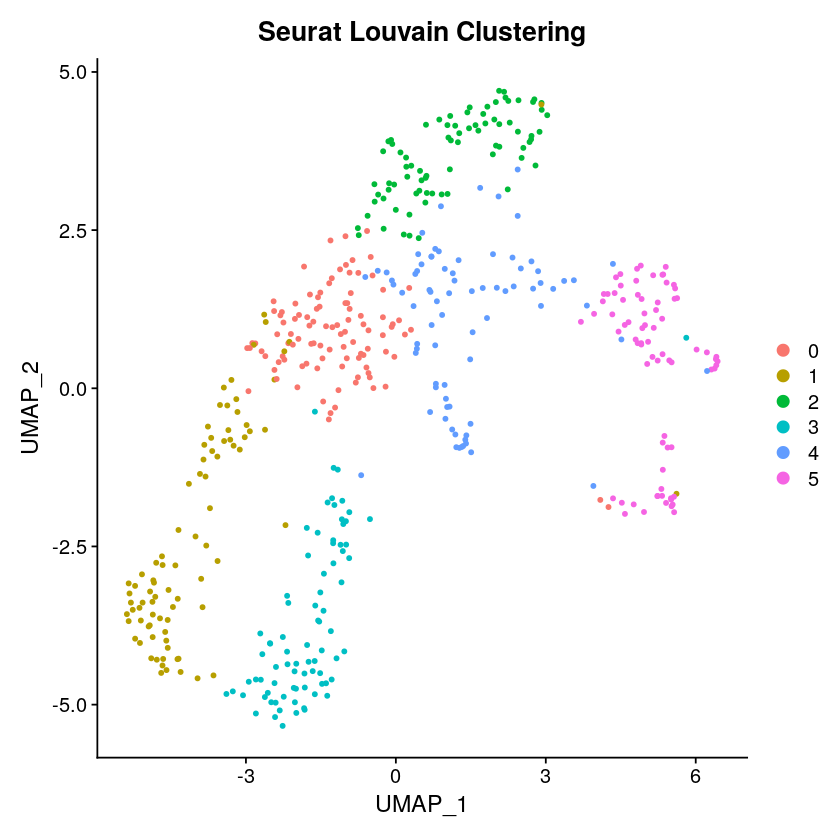

In [1]:
library(Seurat)
library(Matrix)
library(ggplot2)

# === Load matrix and metadata ===
matrix_file <- "/sharedFolder/Data/mtx_output/matrix.mtx"
features_file <- "/sharedFolder/Data/mtx_output/features.tsv"
barcodes_file <- "/sharedFolder/Data/mtx_output/barcodes.tsv"

mat <- readMM(matrix_file)
genes <- readLines(features_file)
barcodes <- readLines(barcodes_file)

rownames(mat) <- genes
colnames(mat) <- barcodes

# === Subsample (optional) ===
set.seed(42)
selected_cells <- sample(colnames(mat), 500)
mat <- mat[, selected_cells]

# === Create Seurat object ===
seurat_obj <- CreateSeuratObject(counts = mat)

# === Standard Seurat pipeline ===
seurat_obj <- NormalizeData(seurat_obj)
seurat_obj <- FindVariableFeatures(seurat_obj)
seurat_obj <- ScaleData(seurat_obj)
seurat_obj <- RunPCA(seurat_obj)

# Cluster using shared nearest neighbor + Louvain
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:10)
seurat_obj <- FindClusters(seurat_obj, resolution = 0.5)

# UMAP for visualization
seurat_obj <- RunUMAP(seurat_obj, dims = 1:10)

# === Plot clustering result ===
DimPlot(seurat_obj, reduction = "umap", group.by = "seurat_clusters") +
  ggtitle("Seurat Louvain Clustering")


In [2]:
# Make sure your Seurat object is already processed with:
# NormalizeData(), FindVariableFeatures(), ScaleData(),
# RunPCA(), FindNeighbors(), FindClusters(), RunUMAP()

# Extract cluster assignments and UMAP coordinates
cell_ids <- colnames(seurat_obj)
clusters <- as.character(Idents(seurat_obj))
umap <- Embeddings(seurat_obj, "umap")

# Combine into a single data frame
df <- data.frame(
  cell = cell_ids,
  cluster = clusters,
  UMAP_1 = umap[, 1],
  UMAP_2 = umap[, 2]
)

# Write to CSV
write.csv(df, "/sharedFolder/seurat_clusters_umap.csv", row.names = FALSE)

cat("✅ CSV file saved as /sharedFolder/seurat_clusters_umap.csv\n")


✅ CSV file saved as /sharedFolder/seurat_clusters_umap.csv


In [8]:
df

cell,cluster,UMAP_1,UMAP_2
<chr>,<fct>,<dbl>,<dbl>
GSM4557331_558_cell.counts.matrices_GGACTATACACT,2,0.0921291,3.72744800
GSM4557331_558_cell.counts.matrices_AGGAACGGGTTC,2,-0.4292904,3.22544242
GSM4557335_HIP015_cell.counts.matrices_TCAAGAAAAGAA,4,2.1919988,1.53611613
GSM4557332_559_cell.counts.matrices_CGCCAGGCCACA,4,0.7114914,2.08333827
GSM4557330_557_cell.counts.matrices_TTTCTCTACCGC,1,-4.5932995,-3.98883055
GSM4557339_HIP045_cell.counts.matrices_ACCGCGTTAATG,1,-5.3460251,-3.08382653
GSM4557331_558_cell.counts.matrices_TAACTGGACGGG,2,2.1650337,4.68653346
GSM4557332_559_cell.counts.matrices_TACGGAGGTAGT,0,-1.7190367,1.48185302
GSM4557335_HIP015_cell.counts.matrices_TACCGTCGGGAT,1,-4.3069340,-4.48375987


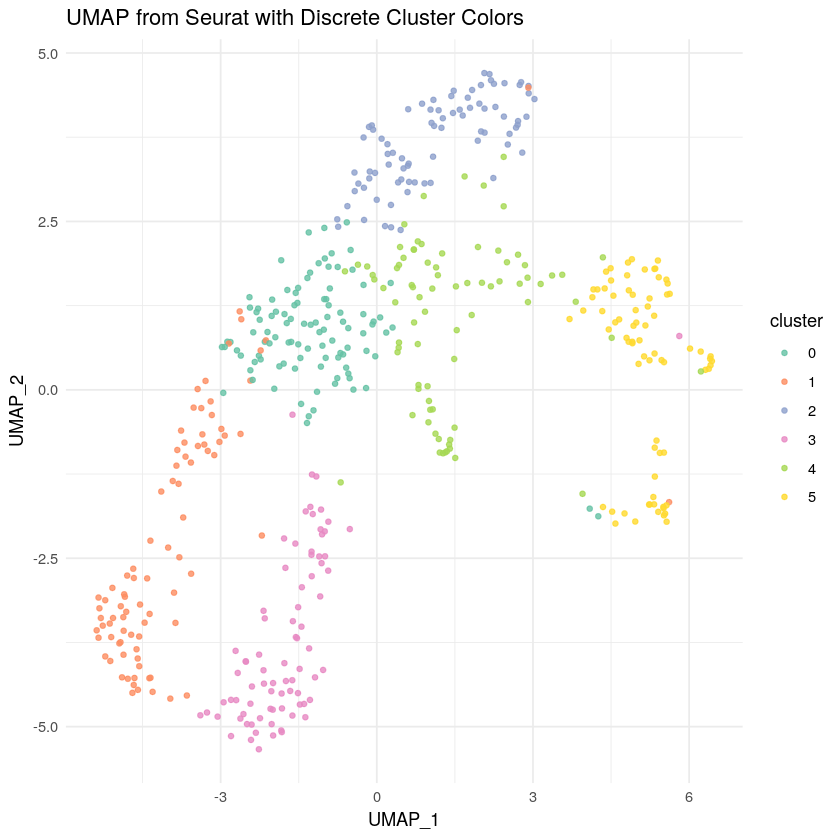

In [7]:
library(ggplot2)

# Load the CSV
df <- read.csv("/sharedFolder/seurat_clusters_umap.csv")

# 🔧 Make sure 'cluster' is treated as categorical
df$cluster <- as.factor(df$cluster)

# Plot with discrete color palette
ggplot(df, aes(x = UMAP_1, y = UMAP_2, color = cluster)) +
  geom_point(alpha = 0.8, size = 1.2) +
  theme_minimal() +
  scale_color_brewer(palette = "Set2") +  # Use "Set1", "Dark2", etc.
  ggtitle("UMAP from Seurat with Discrete Cluster Colors")
